Mode: 35049, Median: 47241.5, Std: 26314.451098884027, Variance: 692277224.0514, Kurtosis: 0.19252083575405443, Skewness: 0.6017233229282185, Range: 160394, Max: 161262, Min: 868, IQR: 36144.0


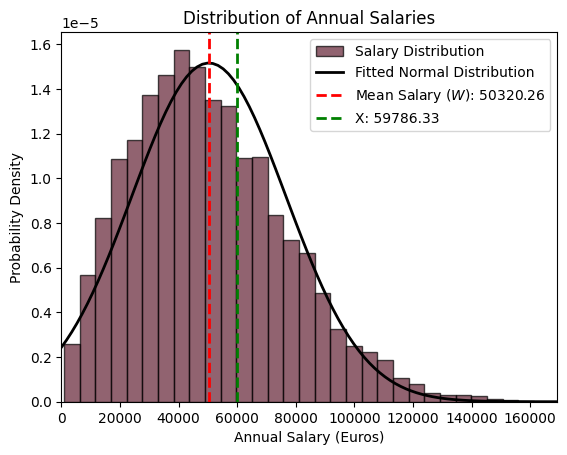

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Read the data from the CSV file 
data = pd.read_csv('data1-1 (1).csv', header=None, names=['Salary'])

def get_statistical_description(data):
    salary_data = data['Salary']
    median = np.median(salary_data)
    mode = salary_data.mode().iloc[0]
    std = salary_data.std()
    variance = np.var(salary_data)
    kurtosis = salary_data.kurtosis()
    skewness = salary_data.skew()
    data_range = max(salary_data) - min(salary_data)
    max_value = max(salary_data)
    min_value = min(salary_data)
    Q1 = np.percentile(salary_data, 25)
    Q3 = np.percentile(salary_data, 75)
    iqr = Q3 - Q1
    return mode, median, std, variance, kurtosis, skewness, data_range, max_value, min_value, iqr

# Assuming 'data' is a DataFrame with a 'Salary' column
mode, median, std, variance, kurtosis, skewness, data_range, max_value, min_value, iqr = get_statistical_description(data)

print(f"Mode: {mode}, Median: {median}, Std: {std}, Variance: {variance}, Kurtosis: {kurtosis}, Skewness: {skewness}, Range: {data_range}, Max: {max_value}, Min: {min_value}, IQR: {iqr}")

def HistPlot(data):
    # Plot the histogram
    plt.hist(data, bins=30, density=True, alpha=0.7, color='#632134', edgecolor='black', label='Salary Distribution')

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Plot the PDF
    plt.plot(x, p, 'k', linewidth=2,label='Fitted Normal Distribution')

    # Calculate and print the value X
    mean_salary = np.mean(data)
    plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary ($W$): {mean_salary:.2f}')
    X = np.percentile(data,67)
    plt.axvline(X, color='green', linestyle='dashed', linewidth=2, label=f'X: {X:.2f}')

    # Add labels, title, and legend
    plt.xlabel('Annual Salary (Euros)')
    plt.ylabel('Probability Density')
    plt.title('Distribution of Annual Salaries')
    plt.legend()

    # Set x-axis and y-axis limits to start from 0
    plt.xlim(0, xmax)
    plt.ylim(0, plt.ylim()[1])

    plt.savefig('salary_distribution_plot.png')
    # Show the plot
    plt.show()

# Drop NaN values and use the Series
HistPlot(data['Salary'])
